# Automatizovaná detekce rotace DH PSF

In [5]:
from PSFrot import PSFrot
import proplot as pplt
import numpy as np 
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray, gray2rgb
# from scipy.ndimage.measurements import center_of_mass
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

-79.99202019855866
-90.0
0.0
113.96248897457819
116.56505117707799
-66.03751102542182
90.0
82.8749836510982
-81.86989764584403
53.13010235415598


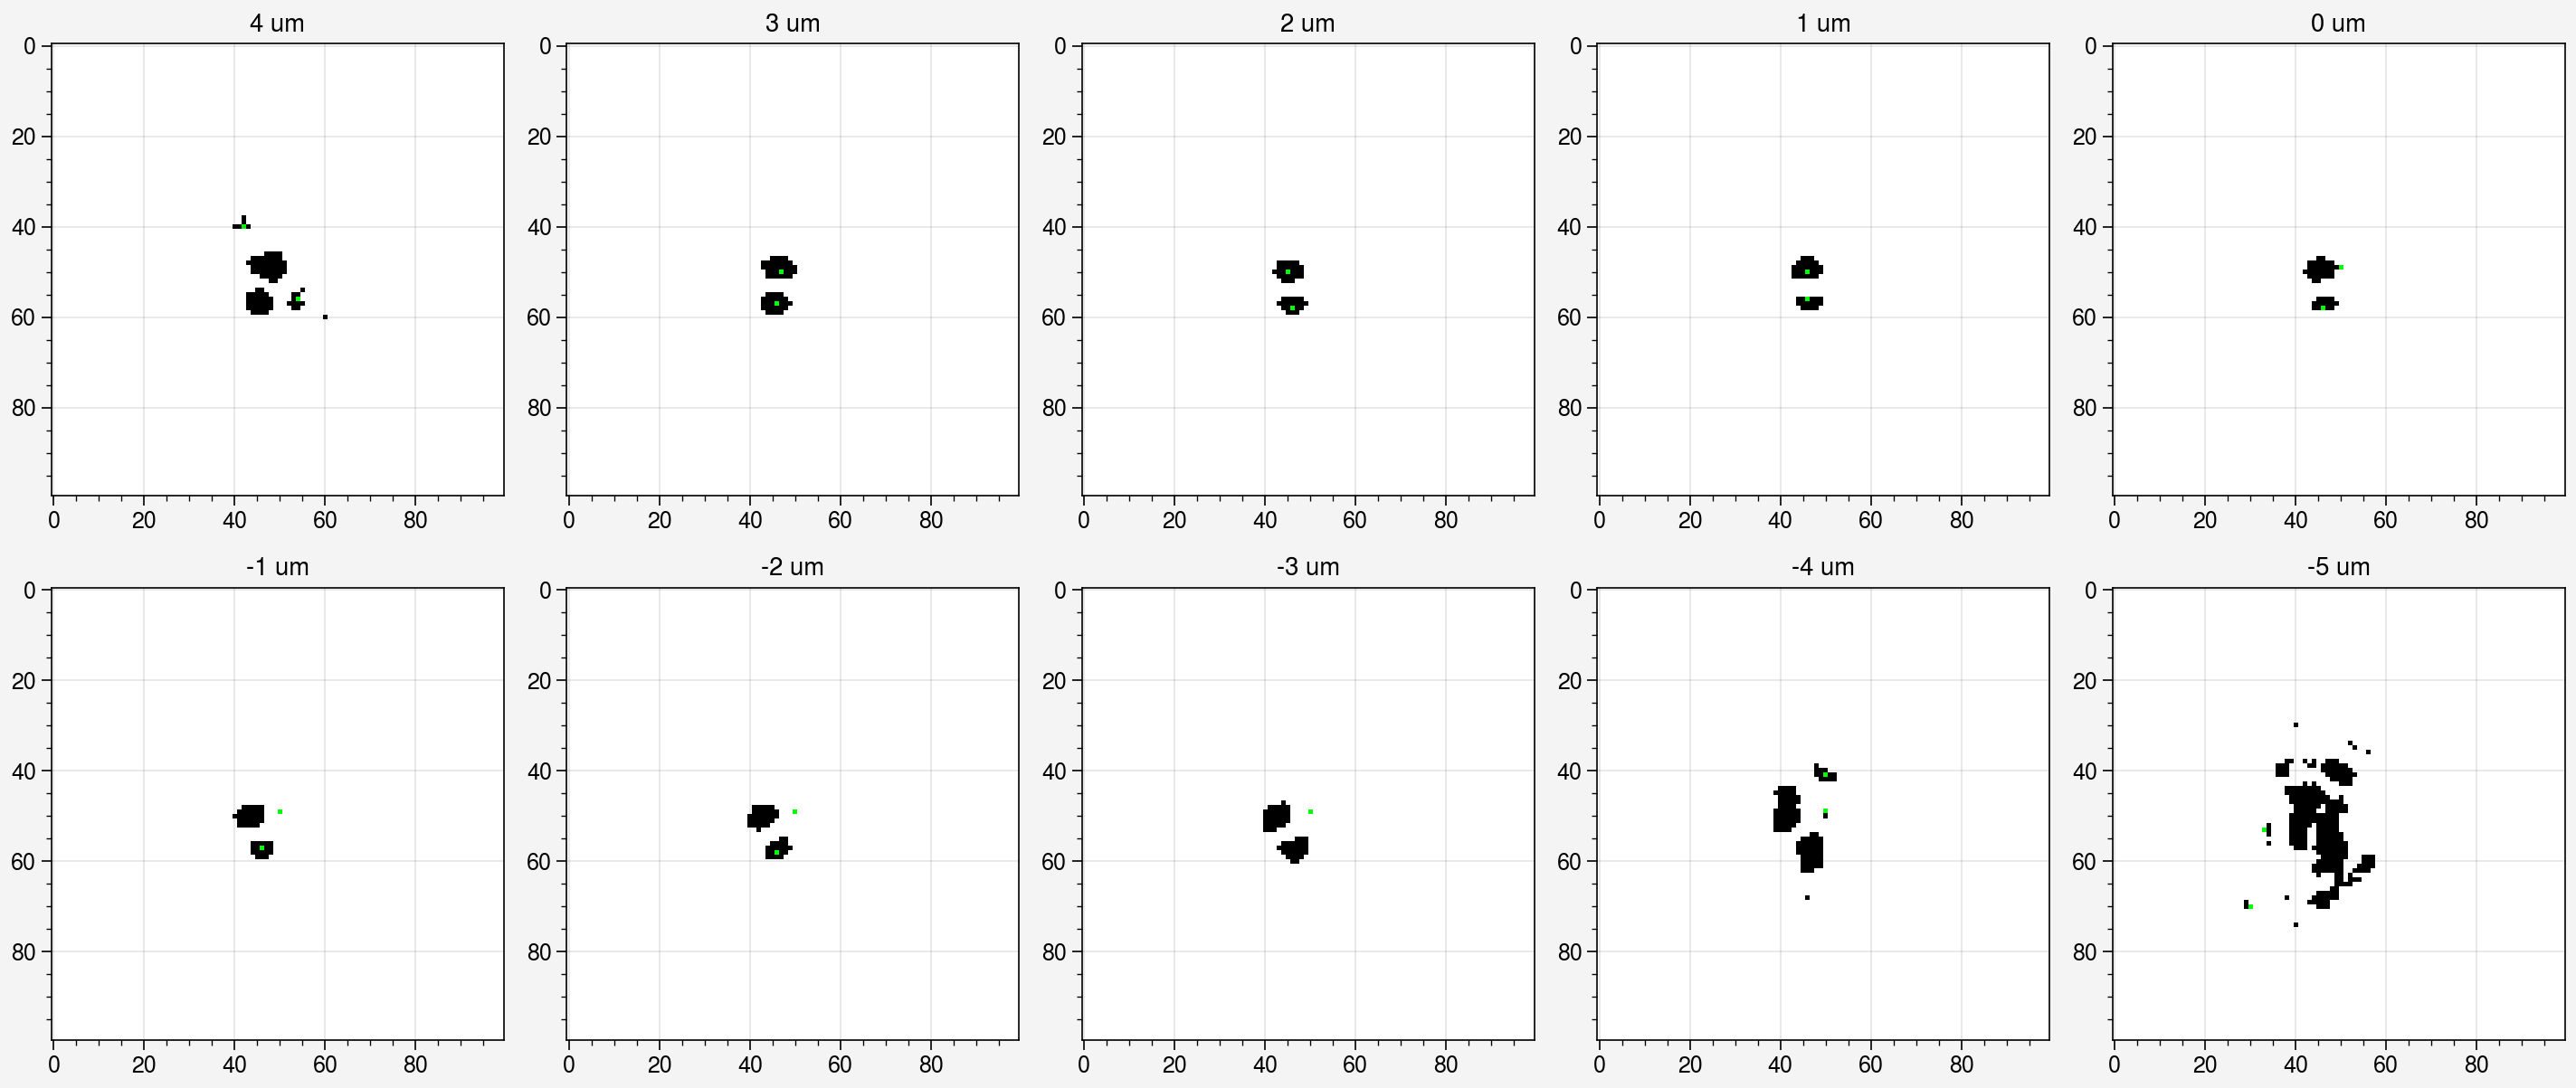

In [10]:
fig, axs = pplt.subplots(nrows = 2, ncols = 5, share=False)

angles = np.zeros(10)

for i in range(-5, 5):
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path = filename)
    image = PSFrot.threshold(image, intensity=0.4)
    cx, cy, rad = PSFrot.findCircles(image)
    imC = gray2rgb(image)
    print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i%5].imshow(imC)
    axs[i//5, 4-i%5].format(title = str(i) + " um")
    
fig.save("vysl_circ.png", dpi=333)


(50.1, 42.8) 
 (57.23809523809524, 46.285714285714285)


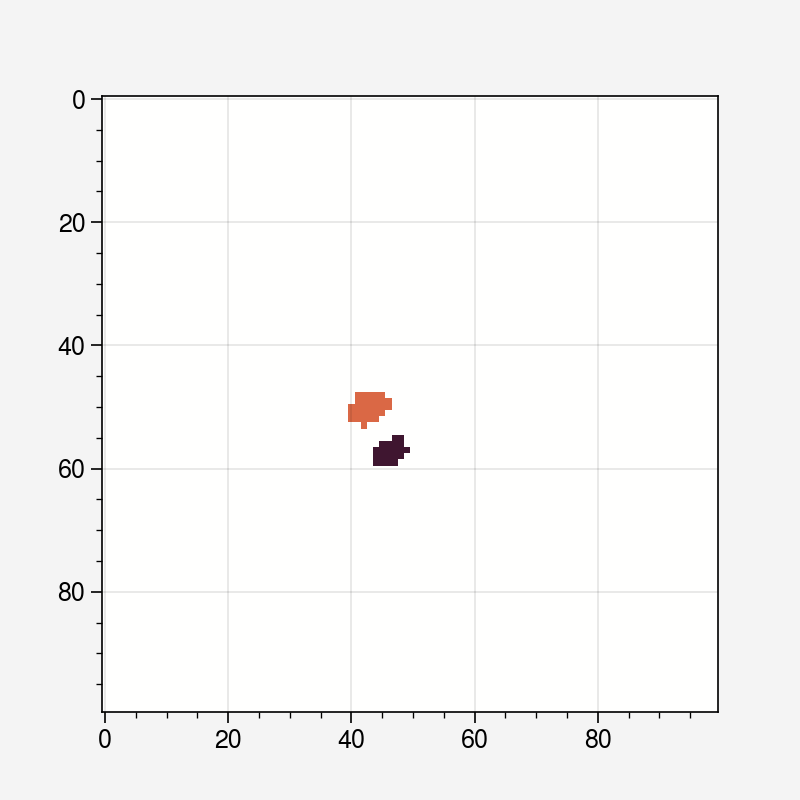

In [7]:
i = -2
filename = "test_imgs/" + str(i) + ".tiff"
image = PSFrot.readImage(path = filename)
image = PSFrot.threshold(image, intensity=0.4)
# cx, cy, rad = PSFrot.findCircles(image)
# imC = gray2rgb(image)
# print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
# for cx, cy in zip(cx, cy):
#     imC[cy, cx] = (0, 1., 0)
# axs[i//5, 4-i%5].imshow(imC)
# axs[i//5, 4-i%5].format(title = str(i) + " um")


fill_psf = np.abs(1-image)
plt.imshow(fill_psf)
# fill_psf = ndi.binary_fill_holes(image)
label_objects, nb_labels = ndi.label(fill_psf)
plt.imshow(label_objects)
c1 = ndi.center_of_mass(label_objects*(label_objects==1))
c2 = ndi.center_of_mass(label_objects*(label_objects==2))

print(c1, '\n', c2)

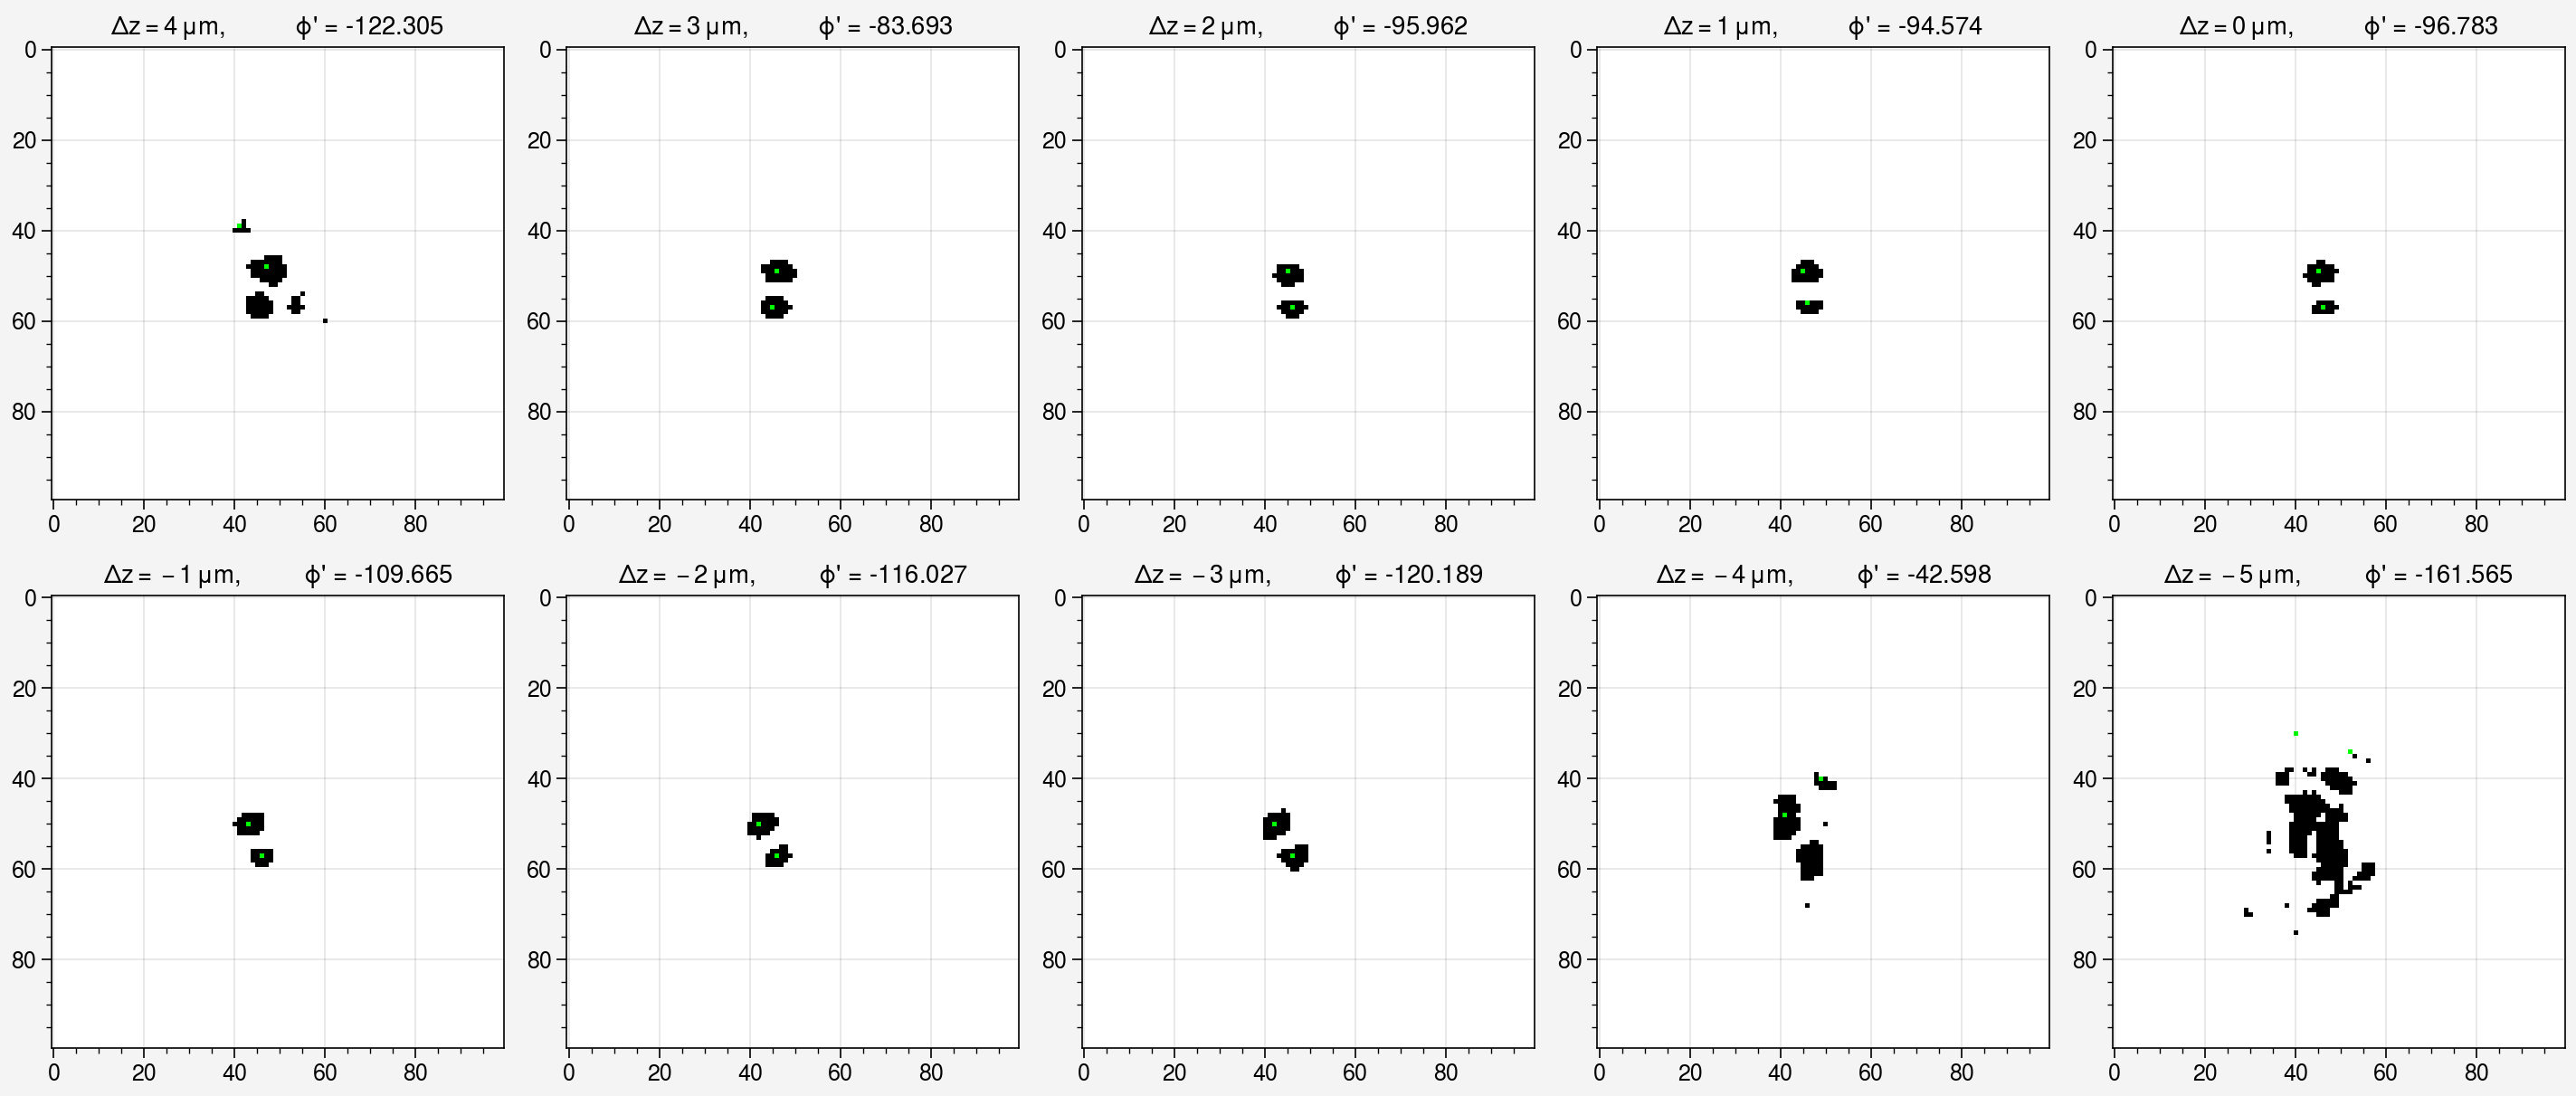

In [12]:
fig, axs = pplt.subplots(nrows=2, ncols=5, share=False)

angles = np.zeros(10)
defocus = np.zeros(10)

for i in range(-5, 5):
    defocus[i] = i
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path=filename)
    image = PSFrot.threshold(image, intensity=0.4)
    imC = gray2rgb(image)
    fill_psf = np.abs(1-image)
    label_objects, _ = ndi.label(fill_psf)
    c1 = ndi.center_of_mass(label_objects*(label_objects == 1))
    c2 = ndi.center_of_mass(label_objects*(label_objects == 2))
    # print(c1)
    # print(c2)
    cx = [int(c1[1]), int(c2[1])]
    cy = [int(c1[0]), int(c2[0])]
    # cx, cy, rad = PSFrot.findCircles(image)
    # imC = gray2rgb(image)
    angles[i] = np.rad2deg(np.arctan2(c1[0] - c2[0], c1[1] - c2[1]))
    # imC[cx[0]] = (0, 1., 0)
    # imC[c2[0], c2[1]] = (0, 1., 0)
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i % 5].imshow(imC)
    axisTitle = "$\Delta z = " + \
        str(i) + " \,\mu m$, \t $\phi$' = " + str(round(angles[i], 3))
    axs[i//5, 4-i % 5].format(title=axisTitle)

fig.save("vysl_CoM.png", dpi=333)


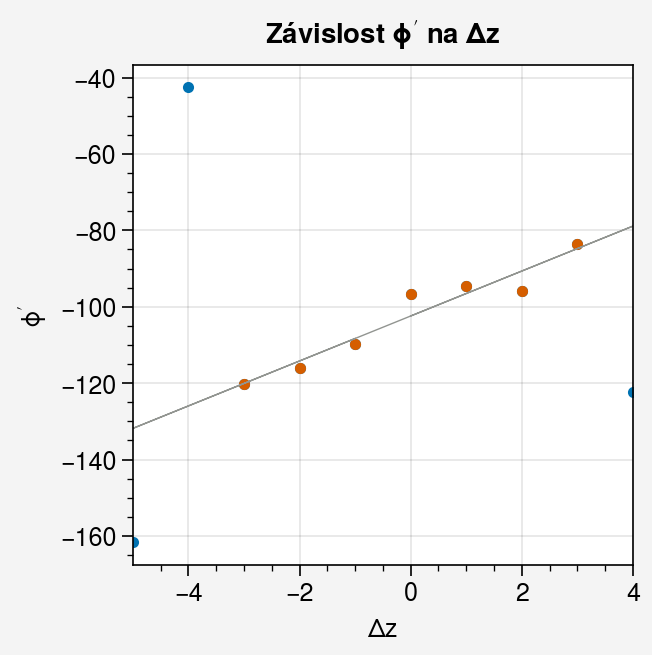

In [27]:
cond = (np.abs(defocus) < 4)
params = np.polyfit(defocus[cond], angles[cond], 1)
yFit = np.polyval(params, defocus)

# plot the angles

fig = pplt.figure(suptitle="Závislost $\phi '$ na $\Delta z$ ")
ax = fig.subplot(xlabel="$\Delta z$", ylabel="$\phi '$ ")
ax.plot(defocus, angles, '.', lw=2)
ax.plot(defocus[cond], angles[cond], '.', lw=2)
ax.plot(defocus, yFit, lw=0.5, color='grey')
fig.save('defocus.png', dpi = 333)